In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2023-06-06'

df = yf.download('AAPL', start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482924,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550011,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689342,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821992,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801654,394024400


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-30,176.960007,178.990005,176.570007,177.300003,177.300003,55964400
2023-05-31,177.330002,179.350006,176.759995,177.250000,177.250000,99625300
2023-06-01,177.699997,180.119995,176.929993,180.089996,180.089996,68901800
2023-06-02,181.029999,181.779999,179.259995,180.949997,180.949997,61945900
2023-06-05,182.630005,184.949997,178.039993,179.580002,179.580002,121946500


In [4]:
df = df.reset_index()

In [5]:
df['Date'].head()

0   2012-01-03
1   2012-01-04
2   2012-01-05
3   2012-01-06
4   2012-01-09
Name: Date, dtype: datetime64[ns]

In [6]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.tail()

,Open,High,Low,Close,Volume
2869,176.960007,178.990005,176.570007,177.300003,55964400
2870,177.330002,179.350006,176.759995,177.250000,99625300
2871,177.699997,180.119995,176.929993,180.089996,68901800
2872,181.029999,181.779999,179.259995,180.949997,61945900
2873,182.630005,184.949997,178.039993,179.580002,121946500


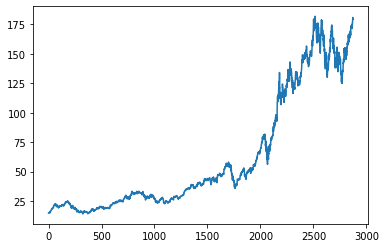

In [7]:
plt.plot(df.Close)

In [8]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

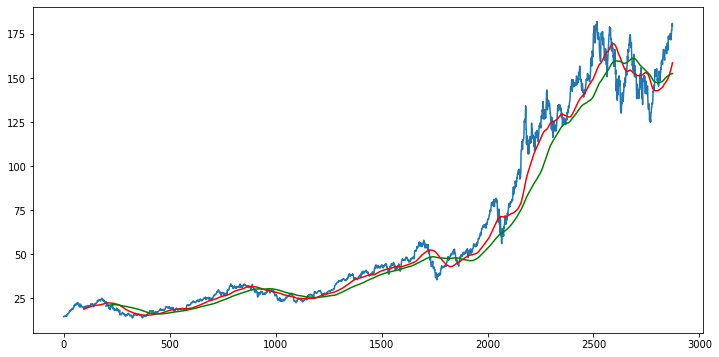

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [10]:
df.shape

(2874, 5)

In [11]:
#Splitting data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

print(data_training)

          Close
0     14.686786
1     14.765714
2     14.929643
3     15.085714
4     15.061786
...         ...
2006  71.000000
2007  71.067497
2008  72.477501
2009  72.449997
2010  72.879997

[2011 rows x 1 columns]


In [12]:
print(data_testing)

           Close
2011   73.412498
2012   75.087502
2013   74.357498
2014   74.949997
2015   74.597504
...          ...
2869  177.300003
2870  177.250000
2871  180.089996
2872  180.949997
2873  179.580002

[863 rows x 1 columns]


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01254461],
       [0.01388391],
       [0.01666555],
       ...,
       [0.99317021],
       [0.99270351],
       [1.        ]])

In [15]:
data_training_array.shape

(2011, 1)

In [16]:
data_testing.shape

(863, 1)

In [17]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[[0.01254461],
        [0.01388391],
        [0.01666555],
        ...,
        [0.10086602],
        [0.10910184],
        [0.10592628]],

       [[0.01388391],
        [0.01666555],
        [0.01931386],
        ...,
        [0.10910184],
        [0.10592628],
        [0.10409002]],

       [[0.01666555],
        [0.01931386],
        [0.01890783],
        ...,
        [0.10592628],
        [0.10409002],
        [0.1101381 ]],

       ...,

       [[0.58350656],
        [0.59903282],
        [0.60768676],
        ...,
        [0.94875499],
        [0.96809914],
        [0.96924447]],

       [[0.59903282],
        [0.60768676],
        [0.62630976],
        ...,
        [0.96809914],
        [0.96924447],
        [0.99317021]],

       [[0.60768676],
        [0.62630976],
        [0.61595899],
        ...,
        [0.96924447],
        [0.99317021],
        [0.99270351]]])

In [18]:
#ML MODEL

In [19]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

2023-07-17 10:08:43.917423: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-17 10:08:44.023592: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-17 10:08:44.023605: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-17 10:08:44.043393: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-07-17 10:08:44.456709: W tensorflow/stream_executor/platform/de

In [20]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

2023-07-17 10:08:44.889657: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-17 10:08:44.890143: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-17 10:08:44.890296: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-07-17 10:08:44.890438: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-07-17 10:08:44.890579: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
60/60 [==============================] - 9s 106ms/step - loss: 0.0245
Epoch 2/50
60/60 [==============================] - 6s 99ms/step - loss: 0.0055
Epoch 3/50
60/60 [==============================] - 6s 98ms/step - loss: 0.0045
Epoch 4/50
60/60 [==============================] - 6s 97ms/step - loss: 0.0037
Epoch 5/50
60/60 [==============================] - 6s 97ms/step - loss: 0.0041
Epoch 6/50
60/60 [==============================] - 6s 97ms/step - loss: 0.0037
Epoch 7/50
60/60 [==============================] - 6s 97ms/step - loss: 0.0039
Epoch 8/50
60/60 [==============================] - 6s 97ms/step - loss: 0.0038
Epoch 9/50
60/60 [==============================] - 6s 97ms/step - loss: 0.0035
Epoch 10/50
60/60 [==============================] - 6s 96ms/step - loss: 0.0039
Epoch 11/50
60/60 [==============================] - 6s 97ms/step - loss: 0.0027
Epoch 12/50
60/60 [==============================] - 6s 96ms/step - loss: 0.0033
Epoch 13/50
60/60 [=================

In [23]:
model.save('keras_model.h5')

In [24]:
past_100_days = data_training.tail(100)

In [25]:
final_df = past_100_days.append(data_testing, ignore_index=True)

/tmp/ipykernel_40566/531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [26]:
final_df.head()

,Close
0,50.857498
1,50.247501
2,50.119999
3,52.242500
4,50.687500


In [27]:
input_data = scaler.fit_transform(final_df)
input_data

array([[5.59177543e-03],
       [9.66733230e-04],
       [0.00000000e+00],
       [1.60929672e-02],
       [4.30283636e-03],
       [2.38837252e-03],
       [1.14110328e-02],
       [1.87087928e-02],
       [1.87277375e-02],
       [2.30495187e-02],
       [2.27083391e-02],
       [4.09432810e-03],
       [1.13920880e-02],
       [6.97552517e-03],
       [9.57237702e-03],
       [1.61687752e-02],
       [1.56570059e-02],
       [9.89461179e-03],
       [1.65099837e-02],
       [2.42626497e-02],
       [2.42247312e-02],
       [2.59496605e-02],
       [3.07453214e-02],
       [4.38054466e-02],
       [4.28576870e-02],
       [3.46311413e-02],
       [3.68109766e-02],
       [3.83273976e-02],
       [4.22511360e-02],
       [3.88202511e-02],
       [3.26977037e-02],
       [3.45742780e-02],
       [3.26029220e-02],
       [3.89529224e-02],
       [3.67920318e-02],
       [3.47638415e-02],
       [4.45257531e-02],
       [4.57009656e-02],
       [3.50292130e-02],
       [3.85548796e-02],


In [28]:
input_data.shape

(963, 1)

In [29]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [30]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(863, 100, 1)
(863,)


In [31]:
#Making Predictions

y_predicted = model.predict(x_test)

27/27 [==============================] - 1s 27ms/step


In [32]:
y_predicted.shape

(863, 1)

In [33]:
y_predicted

array([[0.18939745],
       [0.19162   ],
       [0.19404384],
       [0.19667116],
       [0.19946742],
       [0.20230263],
       [0.20510529],
       [0.20795439],
       [0.21091886],
       [0.21414402],
       [0.21758404],
       [0.22106536],
       [0.22444373],
       [0.2276608 ],
       [0.23063226],
       [0.23328212],
       [0.23558019],
       [0.23749626],
       [0.23880038],
       [0.23947112],
       [0.23980111],
       [0.24008071],
       [0.24020644],
       [0.23996773],
       [0.23944646],
       [0.23888986],
       [0.23860899],
       [0.2387223 ],
       [0.23926224],
       [0.2401286 ],
       [0.24131674],
       [0.24275623],
       [0.2443384 ],
       [0.24581757],
       [0.24703875],
       [0.24785748],
       [0.24801841],
       [0.24709204],
       [0.24462906],
       [0.24057068],
       [0.23480408],
       [0.22745918],
       [0.21950763],
       [0.21182819],
       [0.20553616],
       [0.20086405],
       [0.19770065],
       [0.195

In [34]:
scaler.scale_

array([0.00758208])

In [35]:
scale_factor = 1/0.02123255

In [36]:
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

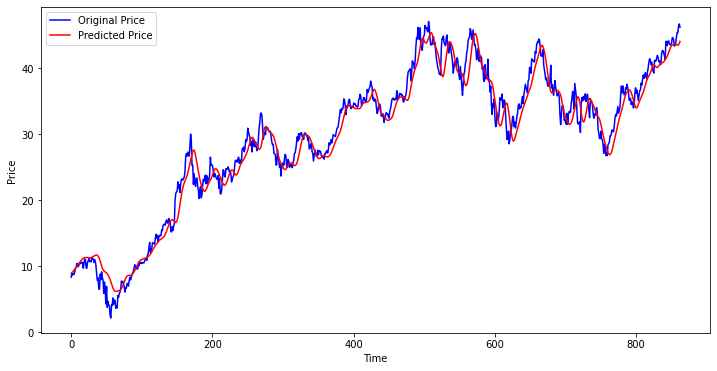

In [37]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label= 'Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()